In [1]:
!pip install kneed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sea
import matplotlib.pyplot as plt
from kneed import  KneeLocator
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score


In [2]:
data = pd.read_csv('/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv')
data.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [3]:
data.shape

(12330, 18)

In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Administrative :27
The number of values for feature Administrative_Duration :3335
The number of values for feature Informational :17
The number of values for feature Informational_Duration :1258
The number of values for feature ProductRelated :311
The number of values for feature ProductRelated_Duration :9551
The number of values for feature BounceRates :1872
The number of values for feature ExitRates :4777
The number of values for feature PageValues :2704
The number of values for feature SpecialDay :6 -- [0.  0.2 0.4 0.6 0.8 1. ]
The number of values for feature Month :10
The number of values for feature OperatingSystems :8 -- [1 2 3 4 5 6 7 8]
The number of values for feature Browser :13
The number of values for feature Region :9 -- [1 2 3 4 5 6 7 8 9]
The number of values for feature TrafficType :20
The number of values for feature VisitorType :3 -- ['New_Visitor' 'Other' 'Returning_Visitor']
The number of values for feature Weekend :2 -- [False  Tru

In [8]:
nominalColumns=['Month','VisitorType','Weekend','Revenue','Region','TrafficType','Region','Browser','OperatingSystems','SpecialDay']

In [9]:
def showData(data):
    for col in data:
        if (col in nominalColumns):
            sea.countplot(data=data, x=col)
        else:
            ax = sea.kdeplot(data[col])
            ax.set(xlabel=col)
        plt.show()


# showData(data)

In [10]:
data_without_NaN=data.dropna(axis=0)
data_without_NaN.shape

(12330, 18)

In [11]:
data_without_duplicates = data.drop_duplicates()
data_without_duplicates.shape

(12205, 18)

In [12]:
def iqr_outliers(data):
    for ind,row in data.iterrows():
        for col in data:
            if(col not  in nominalColumns):
                Q1 = data[col].quantile(0.25)
                Q3 = data[col].quantile(0.75)
                IQR = Q3 - Q1
                if((row[col]< (Q1 - 1.5 * IQR))|(row[col] > (Q3 + 1.5 * IQR))):
                    data=data.drop([ind])
                    break


    return data


# data_after_iqr = iqr_outliers(data_without_duplicates)
# data_after_iqr.shape

In [13]:
def nominal_to_numeric(data):
    le = LabelEncoder()
    for col in nominalColumns:
        le.fit(data[col])
        data[col]=le.transform(data[col])
    return data

# print(nominal_to_numeric(data_after_iqr))

In [14]:
def min_max_scale(data):
    for col in data:
        scale=MinMaxScaler(feature_range=(-1, 1))
        data = pd.DataFrame(scale.fit_transform(data.values), columns=data.columns, index=data.index)
    return data

def standard_scale(data):
    scale=StandardScaler()
    datapom=pd.DataFrame()
    datapom = pd.DataFrame(scale.fit_transform(data.values), columns=data.columns, index=data.index)
    
    return datapom

temp_data=standard_scale(nominal_to_numeric(data))

# print(temp_data)

In [15]:
# sea.pairplot(data)

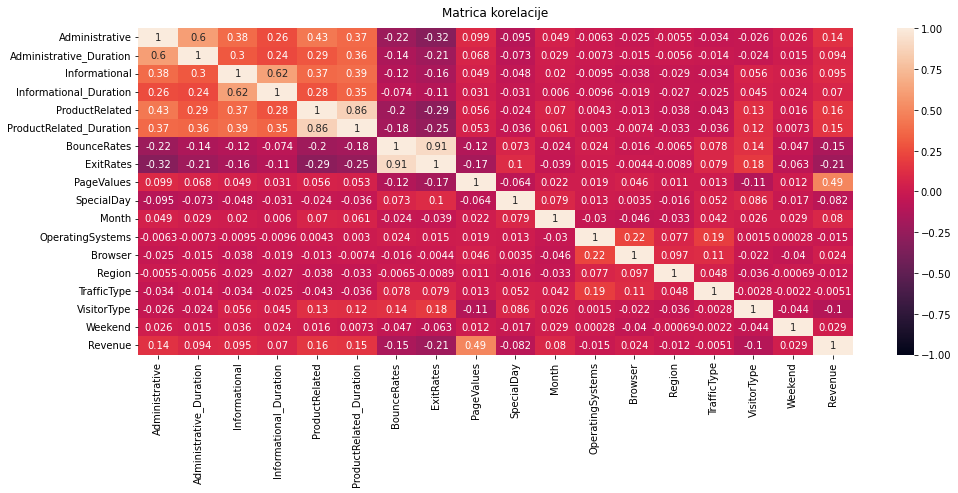

In [16]:
plt.figure(figsize=(16, 6))
heatmap = sea.heatmap(temp_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Matrica korelacije', fontdict={'fontsize':12}, pad=12);

# KMeans

[1 1 1 ... 1 1 1]
197751.89904879167
(12330,)


<AxesSubplot:xlabel='VisitorType', ylabel='Revenue'>

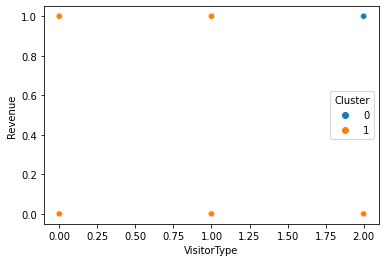

In [17]:
dataScaled=standard_scale(data)
km=KMeans(n_clusters=2,random_state=42)
km.fit(dataScaled)
km.predict(dataScaled)
labels=km.labels_
print(km.labels_)

print(km.inertia_)

print(km.labels_.shape)
data['Cluster']=labels
dataScaled['Cluster']=labels



sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

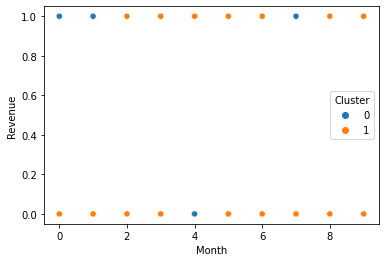

In [18]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated', ylabel='Revenue'>

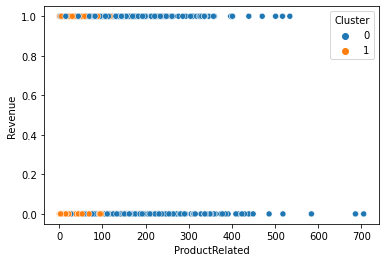

In [19]:
sea.scatterplot(y=data['Revenue'],x=data['ProductRelated'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Revenue'>

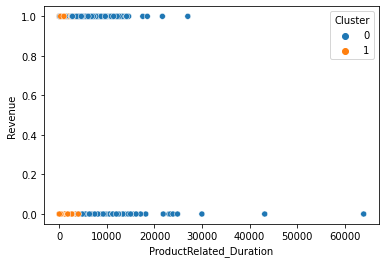

In [20]:
sea.scatterplot(y=data['Revenue'],x=data['ProductRelated_Duration'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Informational', ylabel='Revenue'>

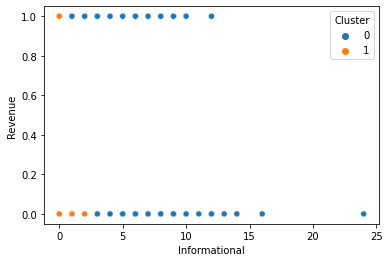

In [21]:
 sea.scatterplot(y=data['Revenue'],x=data['Informational'],hue='Cluster',data=data)  

<AxesSubplot:xlabel='PageValues', ylabel='Revenue'>

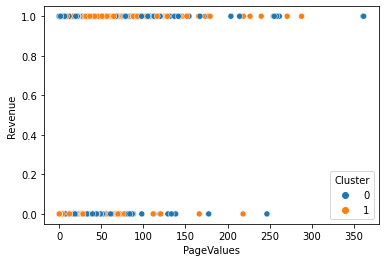

In [22]:
sea.scatterplot(y=data['Revenue'],x=data['PageValues'],hue='Cluster',data=data)  

<AxesSubplot:xlabel='Browser', ylabel='Revenue'>

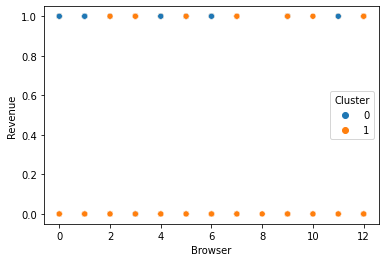

In [23]:
sea.scatterplot(y=data['Revenue'],x=data['Browser'],hue='Cluster',data=data)  

# Elbow metoda Inertia

In [24]:
no_of_clusters = range(1,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(dataScaled)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 1 Clusters is: 223692.20802919718
The innertia for : 2 Clusters is: 197751.87037314172
The innertia for : 3 Clusters is: 178134.70342360198
The innertia for : 4 Clusters is: 164795.38460027432
The innertia for : 5 Clusters is: 155323.77856869687
The innertia for : 6 Clusters is: 148559.81229278626
The innertia for : 7 Clusters is: 139622.475021518
The innertia for : 8 Clusters is: 133402.283006622
The innertia for : 9 Clusters is: 128129.6483324191
The innertia for : 10 Clusters is: 123132.60057260543
The innertia for : 11 Clusters is: 119116.29769789742
The innertia for : 12 Clusters is: 114538.57193401197
The innertia for : 13 Clusters is: 111701.14796838554
The innertia for : 14 Clusters is: 108262.97399112456
The innertia for : 15 Clusters is: 105656.25735172073
The innertia for : 16 Clusters is: 103367.7757450781
The innertia for : 17 Clusters is: 100399.9169476385
The innertia for : 18 Clusters is: 97627.90674826941
The innertia for : 19 Clusters is: 97024.6030

Text(0.5, 1.0, 'Inertia graf za k')

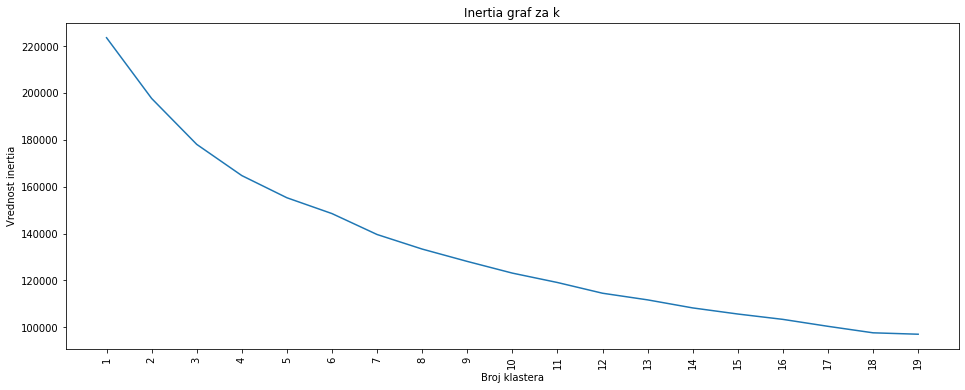

In [25]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Broj klastera')
plt.ylabel('Vrednost inertia')
plt.title("Inertia graf za k")

In [26]:
kl = KneeLocator(
   ...:     range(1, 20), inertia, curve="convex", direction="decreasing"
   ...: )
kl.elbow

7

# Silhouette Score

In [27]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
sc = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(dataScaled)
    score = silhouette_score(dataScaled, kmeans.labels_)
    sc.append(score)
    print("The silhouette_score for :", f, "Clusters is:", score)

The silhouette_score for : 2 Clusters is: 0.2577777522180398
The silhouette_score for : 3 Clusters is: 0.22552071813184887
The silhouette_score for : 4 Clusters is: 0.20432782165040012
The silhouette_score for : 5 Clusters is: 0.1934327192218627
The silhouette_score for : 6 Clusters is: 0.1744979215098257
The silhouette_score for : 7 Clusters is: 0.1928717560461803
The silhouette_score for : 8 Clusters is: 0.15508131801984304
The silhouette_score for : 9 Clusters is: 0.15998353540632662
The silhouette_score for : 10 Clusters is: 0.1576911926290277
The silhouette_score for : 11 Clusters is: 0.14402565764198721
The silhouette_score for : 12 Clusters is: 0.16585116475668488
The silhouette_score for : 13 Clusters is: 0.1458310563978195
The silhouette_score for : 14 Clusters is: 0.14873492993655466
The silhouette_score for : 15 Clusters is: 0.14263504004687239
The silhouette_score for : 16 Clusters is: 0.14795289889331728
The silhouette_score for : 17 Clusters is: 0.14270294612591494
The si

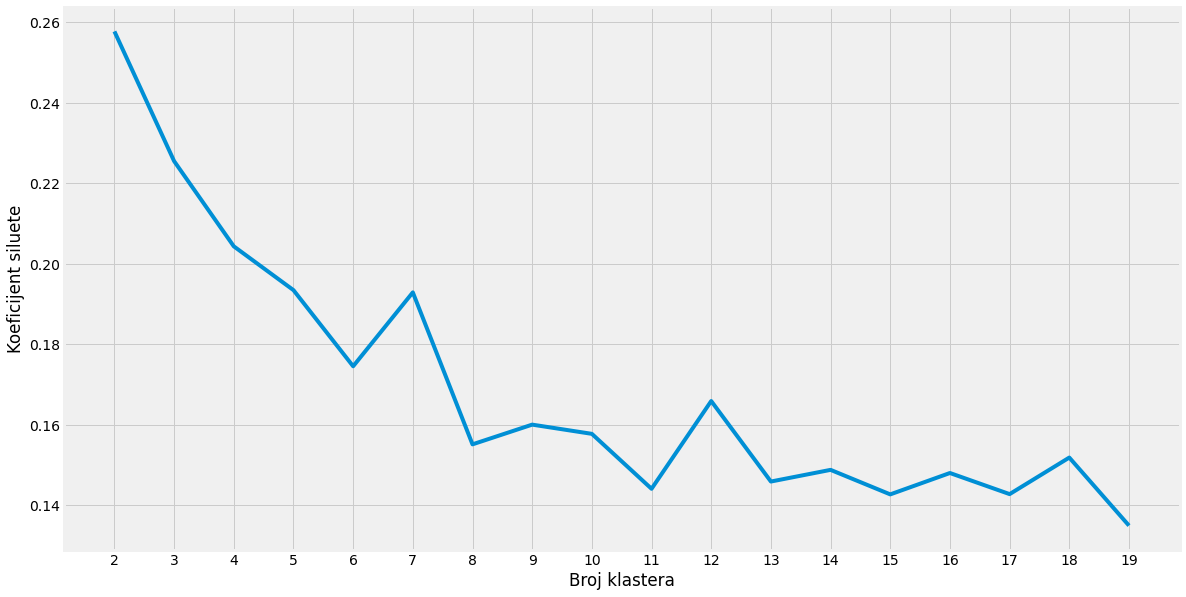

In [28]:
plt.figure(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), sc)
plt.xticks(range(2, 20))
plt.xlabel("Broj klastera")
plt.ylabel("Koeficijent siluete")
plt.show()

# Calinski-Harabasz Index

In [29]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
ch = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(dataScaled)
    score = calinski_harabasz_score(dataScaled, kmeans.labels_)
    ch.append(score)
    print("The calinski_harabasz_score for :", f, "Clusters is:", score)

The calinski_harabasz_score for : 2 Clusters is: 1617.140116148705
The calinski_harabasz_score for : 3 Clusters is: 1576.3002604817536
The calinski_harabasz_score for : 4 Clusters is: 1468.4149597894013
The calinski_harabasz_score for : 5 Clusters is: 1356.267348482339
The calinski_harabasz_score for : 6 Clusters is: 1246.5439081609513
The calinski_harabasz_score for : 7 Clusters is: 1236.6577798380642
The calinski_harabasz_score for : 8 Clusters is: 1191.4043866346678
The calinski_harabasz_score for : 9 Clusters is: 1148.6669101843092
The calinski_harabasz_score for : 10 Clusters is: 1117.942509706884
The calinski_harabasz_score for : 11 Clusters is: 1081.5239905644578
The calinski_harabasz_score for : 12 Clusters is: 1067.1729601618285
The calinski_harabasz_score for : 13 Clusters is: 1029.080655434439
The calinski_harabasz_score for : 14 Clusters is: 1010.0949240713243
The calinski_harabasz_score for : 15 Clusters is: 982.710191540001
The calinski_harabasz_score for : 16 Clusters is

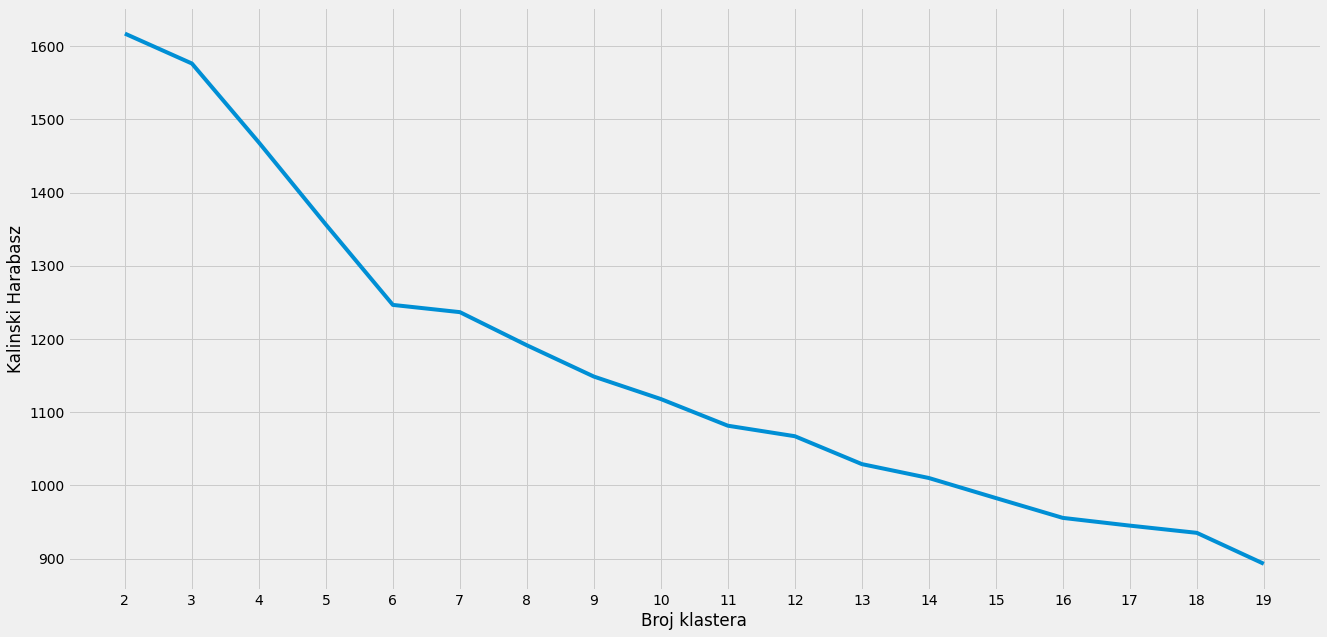

In [30]:
plt.figure(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), ch)
plt.xticks(range(2, 20))
plt.xlabel("Broj klastera")
plt.ylabel("Kalinski Harabasz")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(dataScaled)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(dataScaled)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,2101,1055,9174


<AxesSubplot:xlabel='Cluster', ylabel='value'>

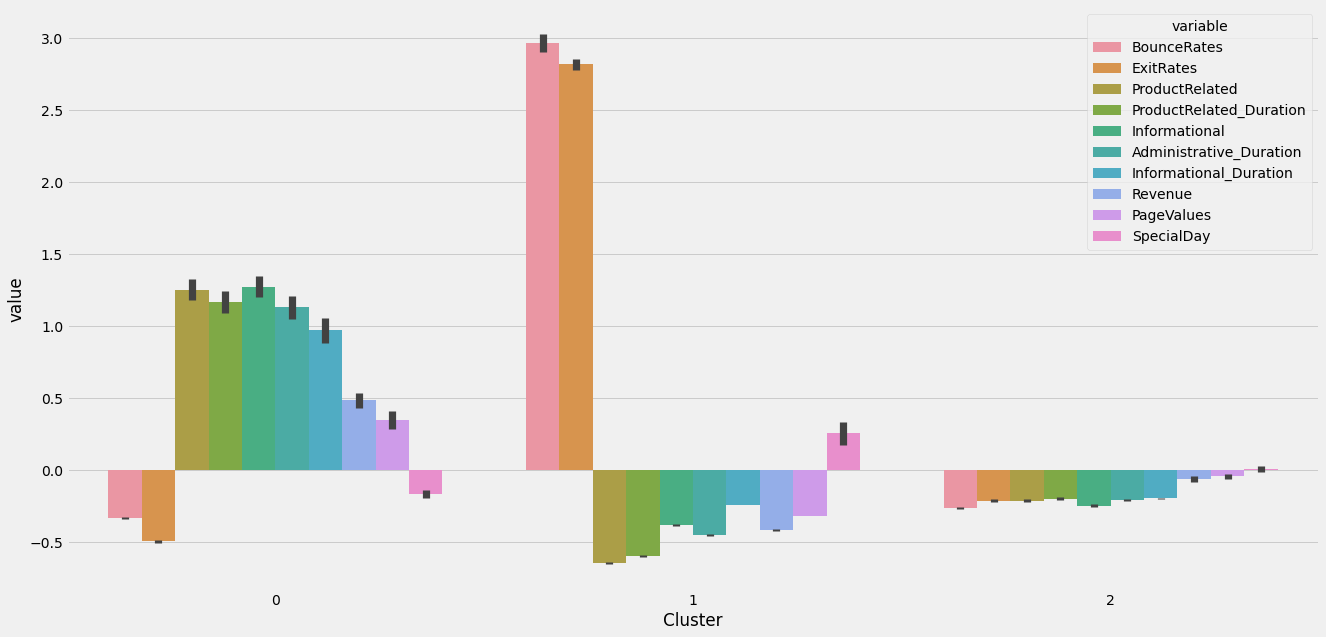

In [32]:
data['Cluster']=kmeans.labels_
dataScaled['Cluster']=kmeans.labels_


plt.figure(figsize=(20, 10))
#sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)
df_mean = (dataScaled.loc[dataScaled.Cluster!=-1, :]
                    .groupby('Cluster').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['Cluster']
tidy = dataScaled[selected_columns].melt(id_vars='Cluster')
sea.barplot(x='Cluster', y='value', hue='variable', data=tidy)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

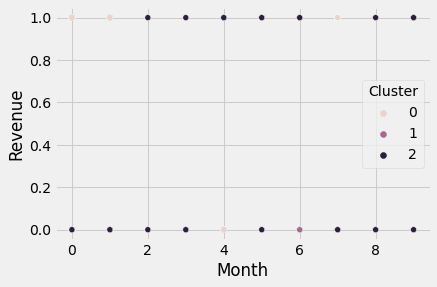

In [33]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='VisitorType'>

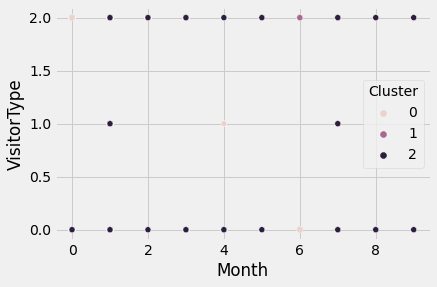

In [34]:
sea.scatterplot(y=data['VisitorType'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated', ylabel='VisitorType'>

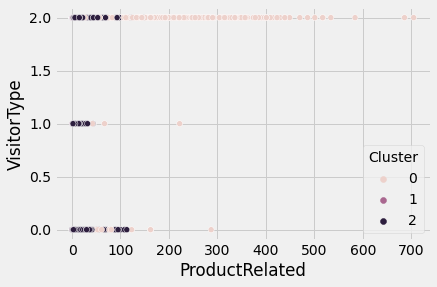

In [35]:
sea.scatterplot(y=data['VisitorType'],x=data['ProductRelated'],hue='Cluster',data=data)

Explained variance ratio (first two components): [0.19832367 0.10733762]


<Figure size 432x288 with 0 Axes>

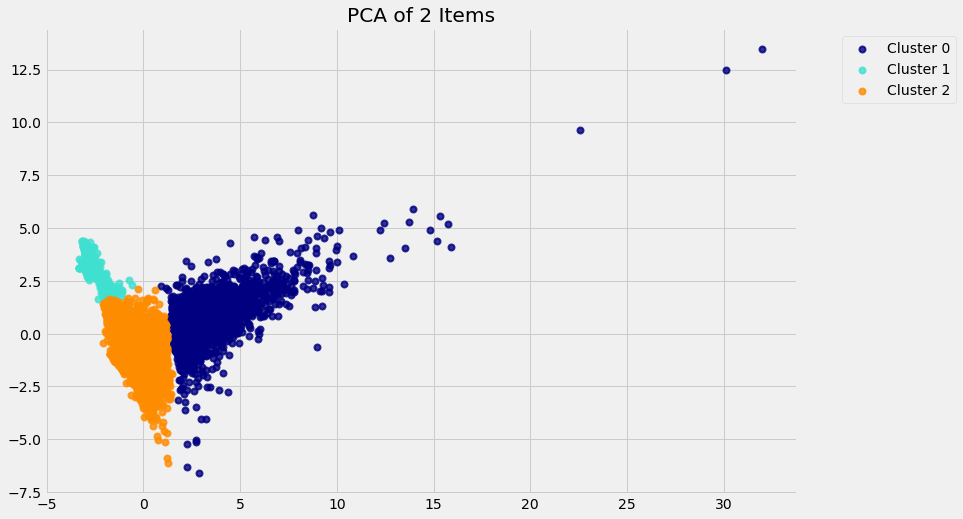

In [36]:

X = dataScaled
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Explained variance ratio (first two components): [0.19832393 0.10733888 0.07741105]


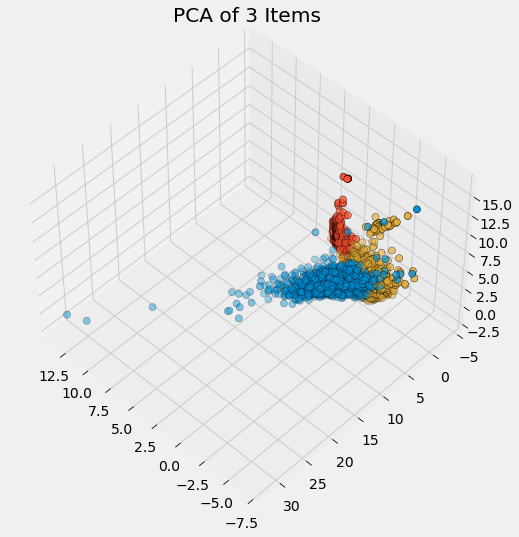

In [37]:
X = dataScaled
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=3, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data

colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 3



fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134,auto_add_to_figure=False)
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    ax.scatter(X_r[y_num == i, 1], X_r[y_num == i, 0], X_r[y_num == i, 2],
           edgecolor="k", s=50)
    fig.add_axes(ax)
plt.title('PCA of 3 Items')
plt.show()

Total Variance in our dataset is:  18.586879186920218
The 95% variance we want to have is:  17.657535227574208

Variance explain with 6 n_compononets:  10.699786175159979
Variance explain with 8 n_compononets:  12.69854712124566
Variance explain with 10 n_compononets:  14.522317540915447
Variance explain with 11 n_compononets:  15.36363466305033
Variance explain with 12 n_compononets:  16.17174572528564
Variance explain with 13 n_compononets:  16.922265130758362
Variance explain with 14 n_compononets:  17.416592033734535
Variance explain with 15 n_compononets:  17.85261352023029


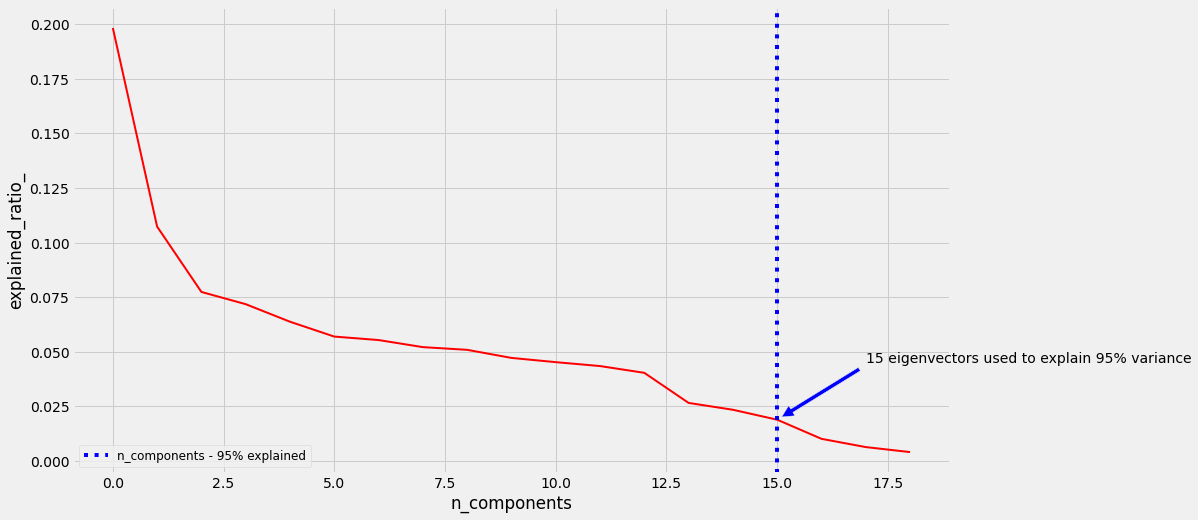

In [38]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 6 n_compononets: ", sum(a["Explained Variance"][0:6]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 11 n_compononets: ", sum(a["Explained Variance"][0:11]))
print("Variance explain with 12 n_compononets: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 13 n_compononets: ", sum(a["Explained Variance"][0:13]))
print("Variance explain with 14 n_compononets: ", sum(a["Explained Variance"][0:14]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(15,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('15 eigenvectors used to explain 95% variance', xy=(15, pca.explained_variance_ratio_[15]), 
             xytext=(17, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 190197.27052342048
The innertia for : 3 Clusters is: 169648.53470550373
kmeans: 0.2462630122958975
The innertia for : 4 Clusters is: 156979.66994116222
The innertia for : 5 Clusters is: 147728.07420387556
The innertia for : 6 Clusters is: 140815.8651720357
The innertia for : 7 Clusters is: 133383.0879239912
The innertia for : 8 Clusters is: 127132.18321127733
The innertia for : 9 Clusters is: 121877.24024954755
The innertia for : 10 Clusters is: 115926.60446378408
The innertia for : 11 Clusters is: 111343.45077274888
The innertia for : 12 Clusters is: 107871.81698375531
The innertia for : 13 Clusters is: 104160.82593359893
The innertia for : 14 Clusters is: 100781.46761161232
The innertia for : 15 Clusters is: 98034.56406536774
The innertia for : 16 Clusters is: 95458.30334382
The innertia for : 17 Clusters is: 93309.04745675443
The innertia for : 18 Clusters is: 92287.3699844922
The innertia for : 19 Clusters is: 89149.8369774898


Text(0.5, 1.0, 'Inertia Plot per k')

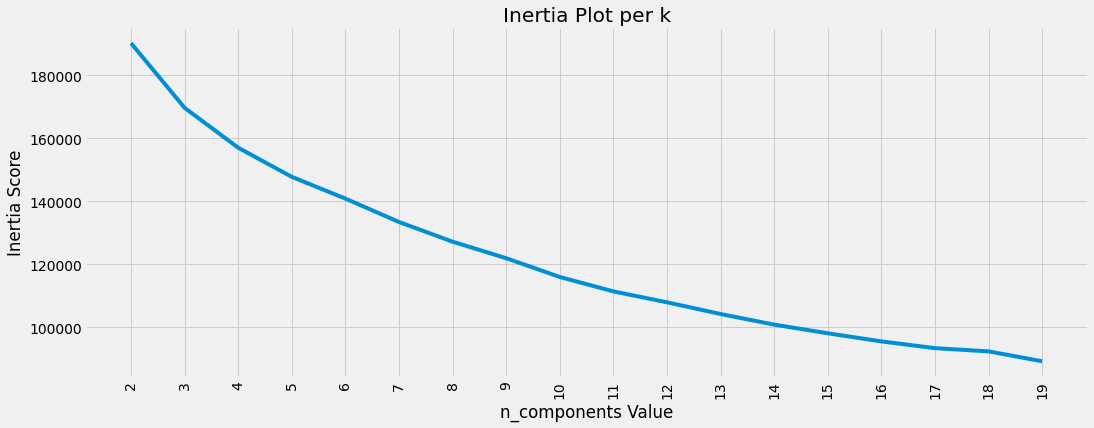

In [39]:
pca = PCA(n_components=15, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)
    if(f==3):
        print('kmeans: {}'.format(silhouette_score(X_r, kmeans.labels_, 
                                           metric='euclidean')))

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [40]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(dataScaled)
# Print results
print('kmeans silhouette score: {}'.format(silhouette_score(dataScaled, km.labels_, 
                                           metric='euclidean')))

kmeans silhouette score: 0.24264388423707586


In [41]:
# Print results
print('kmeans calinski harabasz: {}'.format(calinski_harabasz_score(dataScaled, km.labels_, 
                                          )))

kmeans calinski harabasz: 1766.1163225139735


In [42]:
km=KMeans(n_clusters=2,random_state=42)
km.fit(dataScaled)
km.predict(dataScaled)
labels=km.labels_
ari_kmeans = adjusted_rand_score(data.Revenue, kmeans.labels_)
ari_kmeans

0.06161484558217469

# Hierarchical clustering

<AxesSubplot:xlabel='VisitorType', ylabel='Revenue'>

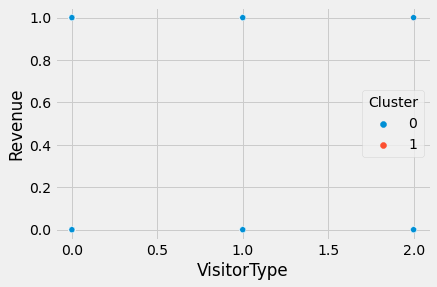

In [43]:
hc=AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
hc.fit_predict(dataScaled)

labels=hc.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels



sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

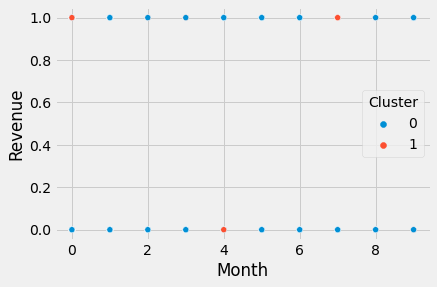

In [44]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated', ylabel='Revenue'>

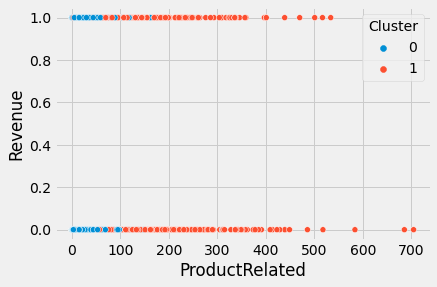

In [45]:
sea.scatterplot(y=data['Revenue'],x=data['ProductRelated'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Cluster', ylabel='value'>

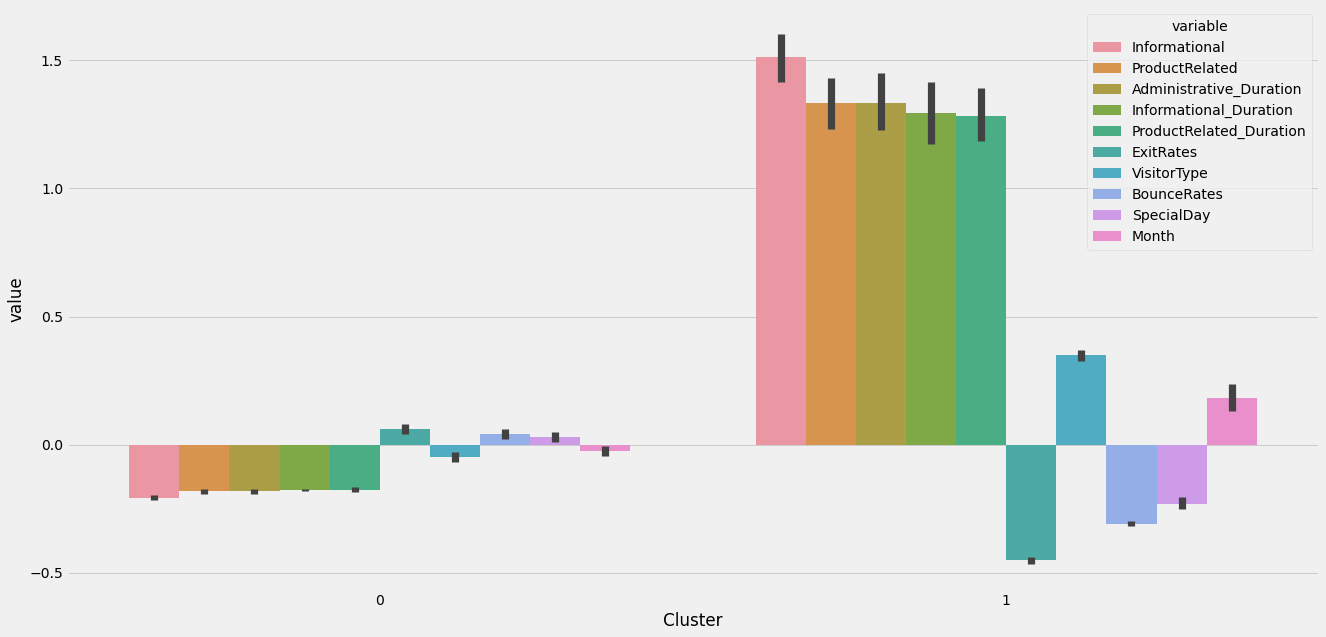

In [46]:
hc=AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
hc.fit(dataScaled)

labels=hc.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels


plt.figure(figsize=(20, 10))
#sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)
df_mean = (dataScaled.loc[dataScaled.Cluster!=-1, :]
                    .groupby('Cluster').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['Cluster']
tidy = dataScaled[selected_columns].melt(id_vars='Cluster')
sea.barplot(x='Cluster', y='value', hue='variable', data=tidy)

In [47]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
ss = []


for f in no_of_clusters:
    hc = AgglomerativeClustering(n_clusters=f, affinity = 'euclidean', linkage = 'ward')
    hc = hc.fit(dataScaled)
    u = silhouette_score(dataScaled, hc.labels_)
    ss.append(u)
    print("The siluete score for :", f, "Clusters is:", u)

The siluete score for : 2 Clusters is: 0.25092340852967354
The siluete score for : 3 Clusters is: 0.23116426557636788
The siluete score for : 4 Clusters is: 0.16926976935976623
The siluete score for : 5 Clusters is: 0.17429139326215143
The siluete score for : 6 Clusters is: 0.14877129450334614
The siluete score for : 7 Clusters is: 0.15827342473579778
The siluete score for : 8 Clusters is: 0.12595168102701768
The siluete score for : 9 Clusters is: 0.13087868959059087
The siluete score for : 10 Clusters is: 0.13575682554562385
The siluete score for : 11 Clusters is: 0.13187152178186592
The siluete score for : 12 Clusters is: 0.13601100302301958
The siluete score for : 13 Clusters is: 0.13664709394964955
The siluete score for : 14 Clusters is: 0.11636067172828157
The siluete score for : 15 Clusters is: 0.12009002812019887
The siluete score for : 16 Clusters is: 0.12347595027200327
The siluete score for : 17 Clusters is: 0.1257764095768113
The siluete score for : 18 Clusters is: 0.1319824

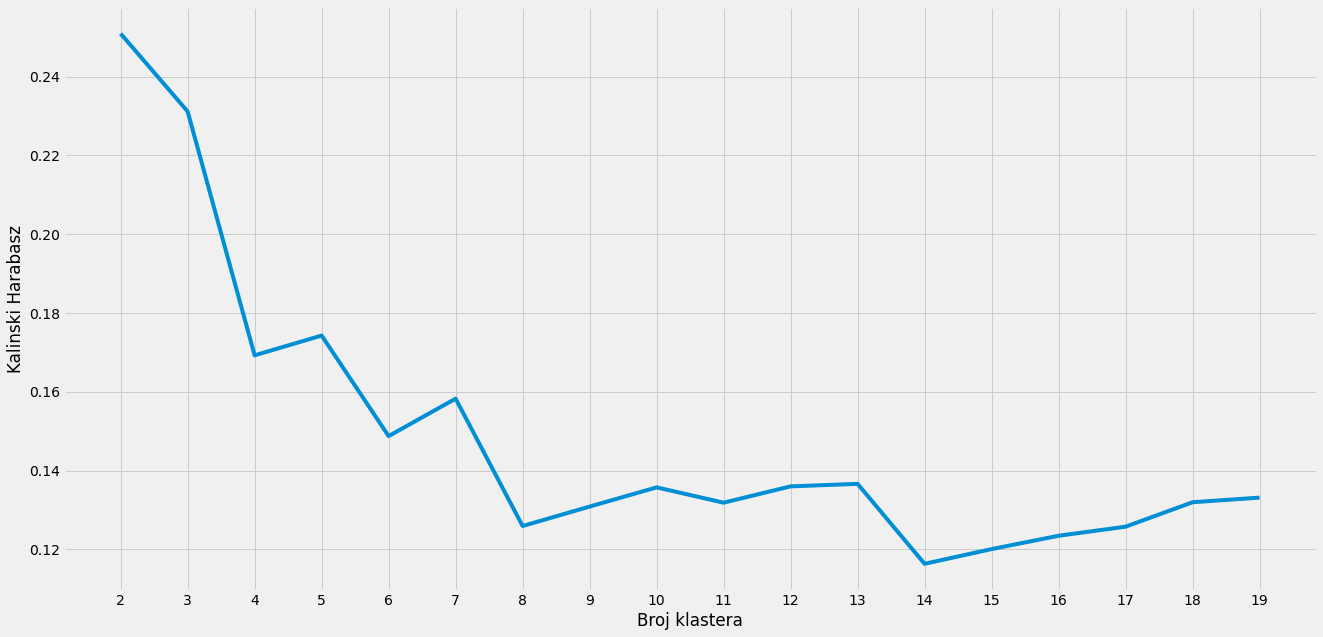

In [48]:
plt.figure(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), ss)
plt.xticks(range(2, 20))
plt.xlabel("Broj klastera")
plt.ylabel("Kalinski Harabasz")
plt.show()

In [49]:
no_of_clusters = range(2,25) #[2,3,4,5,6,7,8,9]
ch = []



for f in no_of_clusters:
    hc = AgglomerativeClustering(n_clusters=f, affinity = 'euclidean', linkage = 'ward')
    hc = hc.fit(dataScaled)
    u = calinski_harabasz_score(dataScaled, hc.labels_)
    ch.append(u)
    print("The calinski_harabasz_score for :", f, "Clusters is:", u)

The calinski_harabasz_score for : 2 Clusters is: 1319.2874485399457
The calinski_harabasz_score for : 3 Clusters is: 1339.859584992881
The calinski_harabasz_score for : 4 Clusters is: 1259.901202456566
The calinski_harabasz_score for : 5 Clusters is: 1179.3919621083771
The calinski_harabasz_score for : 6 Clusters is: 1131.7490574643953
The calinski_harabasz_score for : 7 Clusters is: 1081.78492659924
The calinski_harabasz_score for : 8 Clusters is: 1036.8435814843235
The calinski_harabasz_score for : 9 Clusters is: 1005.0191193434816
The calinski_harabasz_score for : 10 Clusters is: 977.3092877347236
The calinski_harabasz_score for : 11 Clusters is: 942.2307269057034
The calinski_harabasz_score for : 12 Clusters is: 907.8754720114755
The calinski_harabasz_score for : 13 Clusters is: 876.4924992897546
The calinski_harabasz_score for : 14 Clusters is: 851.5404070675738
The calinski_harabasz_score for : 15 Clusters is: 831.6890278883216
The calinski_harabasz_score for : 16 Clusters is: 81

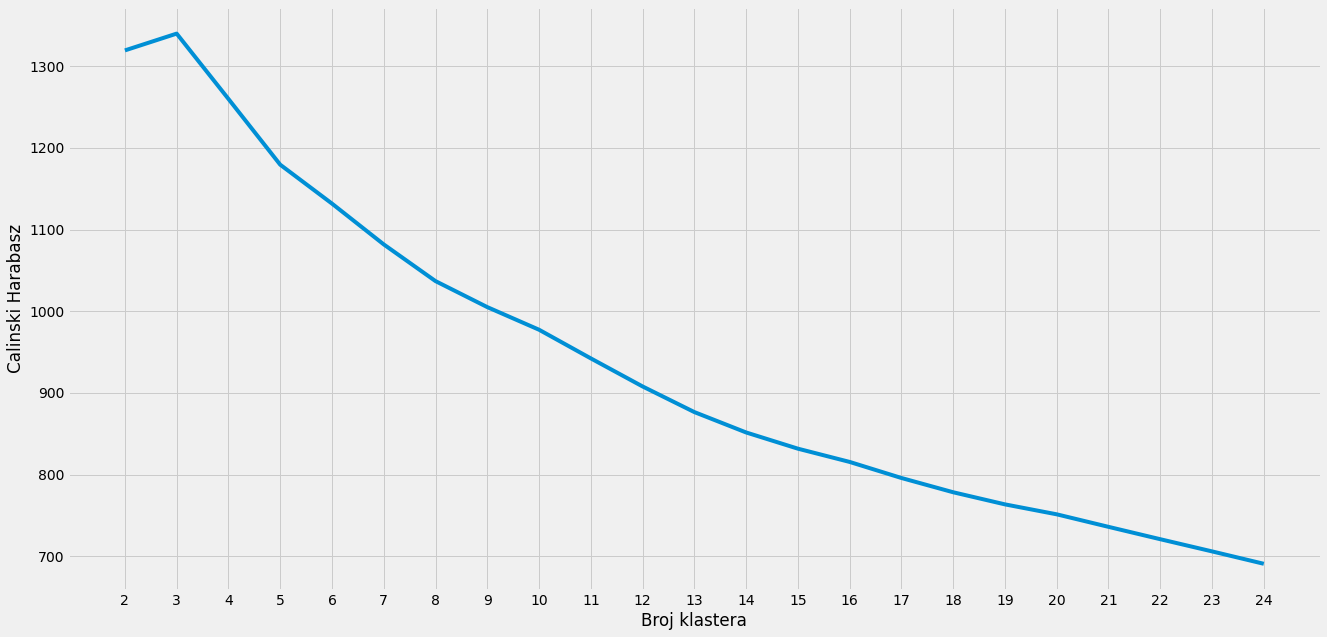

In [50]:
plt.figure(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 25), ch)
plt.xticks(range(2, 25))
plt.xlabel("Broj klastera")
plt.ylabel("Calinski Harabasz")
plt.show()

In [51]:

hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc.fit_predict(dataScaled)



predictions = hc.fit_predict(dataScaled)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,9848,1718,764


<AxesSubplot:xlabel='Cluster', ylabel='value'>

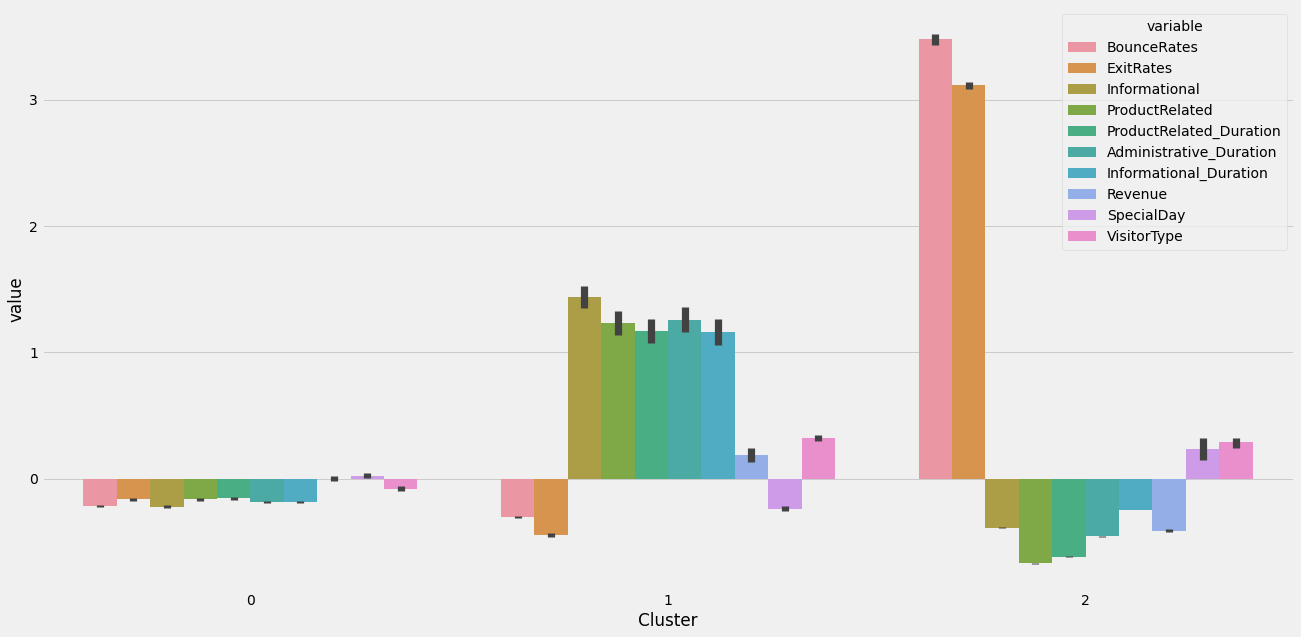

In [52]:
hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc.fit(dataScaled)

labels=hc.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels


plt.figure(figsize=(20, 10))
#sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)
df_mean = (dataScaled.loc[dataScaled.Cluster!=-1, :]
                    .groupby('Cluster').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['Cluster']
tidy = dataScaled[selected_columns].melt(id_vars='Cluster')
sea.barplot(x='Cluster', y='value', hue='variable', data=tidy)

# PCA

## PCA analiza 2 elementa 

Explained variance ratio (first two components): [0.19070958 0.11070682]


<Figure size 432x288 with 0 Axes>

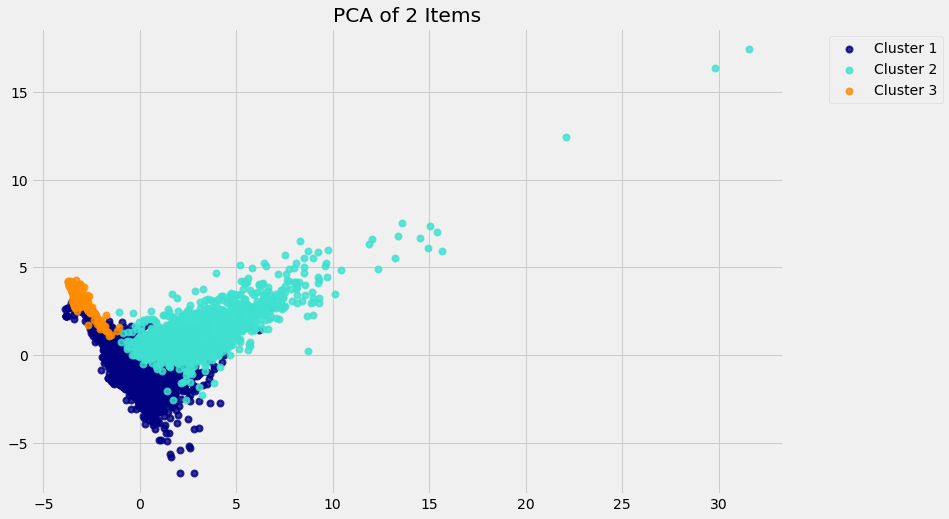

In [53]:
X = dataScaled
y_num = predictions

target_names = ["Cluster 1","Cluster 2","Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

## PCA Analiza 3 elementa

Explained variance ratio (first two components): [0.19071003 0.11070698 0.07809434]


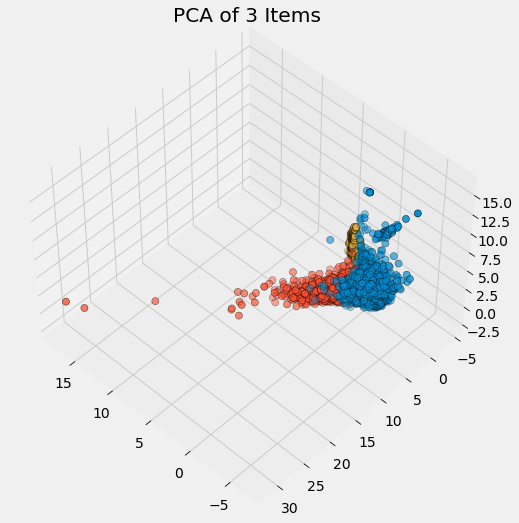

In [54]:
X = dataScaled
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=3, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data

colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 3




fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134,auto_add_to_figure=False)
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    ax.scatter(X_r[y_num == i, 1], X_r[y_num == i, 0], X_r[y_num == i, 2],
           edgecolor="k", s=50)
    fig.add_axes(ax)
plt.title('PCA of 3 Items')
plt.show()

### Silhouette

In [55]:
hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc.fit_predict(dataScaled)
print('kmeans silhouette score: {}'.format(silhouette_score(dataScaled, hc.labels_, 
                                           metric='euclidean')))

kmeans silhouette score: 0.26016004257820347


### Calinski Harabasz

In [56]:
print('kmeans calinski harabasz: {}'.format(calinski_harabasz_score(dataScaled, hc.labels_, 
                                          )))

kmeans calinski harabasz: 1415.8625802264203


### Ari indeks

In [57]:
labels=hc.labels_
ari_ac = adjusted_rand_score(data.Revenue, kmeans.labels_)
ari_ac

0.06161484558217469

# DBSCAN

<AxesSubplot:xlabel='VisitorType', ylabel='Revenue'>

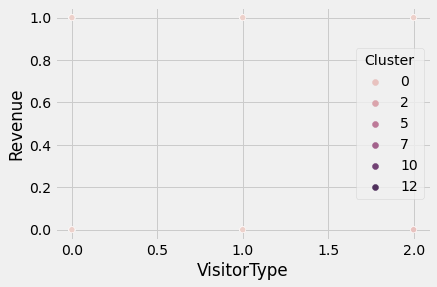

In [58]:
db=DBSCAN(min_samples=19,eps=1.1,n_jobs=-1)
db.fit(dataScaled)

labels=db.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels



sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

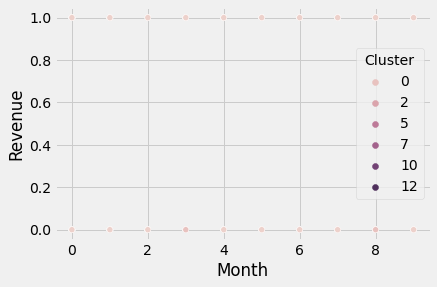

In [59]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='Month', ylabel='Revenue'>

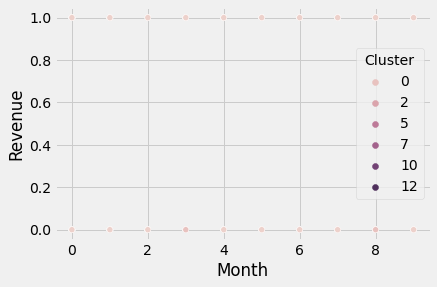

In [60]:
sea.scatterplot(y=data['Revenue'],x=data['Month'],hue='Cluster',data=data)

<AxesSubplot:xlabel='ProductRelated', ylabel='Revenue'>

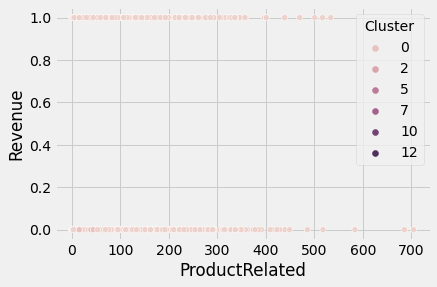

In [61]:
sea.scatterplot(y=data['Revenue'],x=data['ProductRelated'],hue='Cluster',data=data)

In [62]:
no_of_clusters = range(20,38) #[2,3,4,5,6,7,8,9]
ss = []


for f in no_of_clusters:
    db=DBSCAN(min_samples=f,eps=1.1,n_jobs=-1)
    db.fit(dataScaled)
    u = silhouette_score(dataScaled, db.labels_)
    ss.append(u)
    print("The siluete score for :", f, "min points is:", u)

The siluete score for : 20 min points is: -0.04896729002554651
The siluete score for : 21 min points is: -0.05375453787314742
The siluete score for : 22 min points is: -0.07748091843103574
The siluete score for : 23 min points is: -0.07001526396766827
The siluete score for : 24 min points is: -0.07715769380788662
The siluete score for : 25 min points is: -0.09833189176134689
The siluete score for : 26 min points is: -0.1315225176082514
The siluete score for : 27 min points is: -0.1353415736295568
The siluete score for : 28 min points is: -0.14325469696827303
The siluete score for : 29 min points is: -0.15059940597199847
The siluete score for : 30 min points is: -0.09485936343577571
The siluete score for : 31 min points is: -0.10135208796265914
The siluete score for : 32 min points is: -0.10334828587223642
The siluete score for : 33 min points is: -0.12328862479126548
The siluete score for : 34 min points is: -0.1258901787594411
The siluete score for : 35 min points is: -0.1593480367421

Text(0.5, 1.0, 'Silouette Score Plot per k')

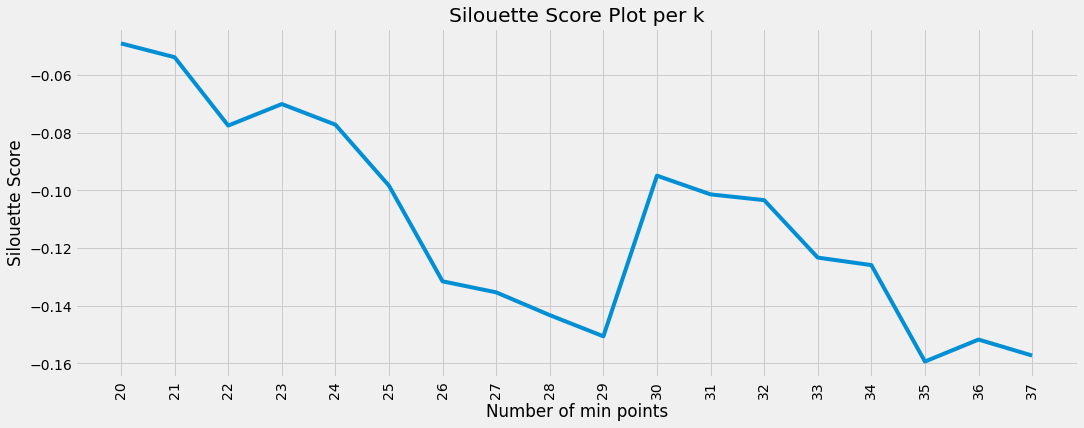

In [63]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, ss)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of min points')
plt.ylabel('Silouette Score')
plt.title("Silouette Score Plot per k")

In [64]:
no_of_clusters = range(20,37) #[2,3,4,5,6,7,8,9]
ch = []


for f in no_of_clusters:
    db=DBSCAN(min_samples=f,eps=1.1,n_jobs=-1)
    db.fit(dataScaled)
    u = calinski_harabasz_score(dataScaled, db.labels_)
    ch.append(u)
    print("The calinski_harabasz score for :", f, "min points is:", u)

The calinski_harabasz score for : 20 min points is: 410.3512162356666
The calinski_harabasz score for : 21 min points is: 393.1760394804541
The calinski_harabasz score for : 22 min points is: 330.2339455707777
The calinski_harabasz score for : 23 min points is: 330.0654871705148
The calinski_harabasz score for : 24 min points is: 311.30437589889885
The calinski_harabasz score for : 25 min points is: 290.4049086207455
The calinski_harabasz score for : 26 min points is: 285.29495454779203
The calinski_harabasz score for : 27 min points is: 274.552346962764
The calinski_harabasz score for : 28 min points is: 264.47963751659404
The calinski_harabasz score for : 29 min points is: 245.43502310512582
The calinski_harabasz score for : 30 min points is: 255.68497929288276
The calinski_harabasz score for : 31 min points is: 263.28381924170725
The calinski_harabasz score for : 32 min points is: 257.9288941221829
The calinski_harabasz score for : 33 min points is: 248.5271581266267
The calinski_ha

Text(0.5, 1.0, 'Calinski Harabasz score per Number of points')

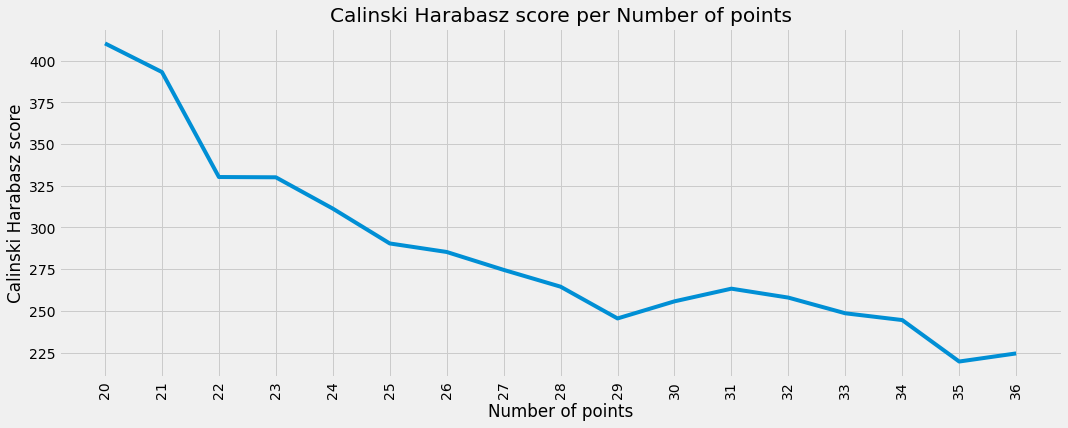

In [65]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, ch)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of points')
plt.ylabel('Calinski Harabasz score')
plt.title("Calinski Harabasz score per Number of points")

<AxesSubplot:xlabel='Cluster', ylabel='value'>

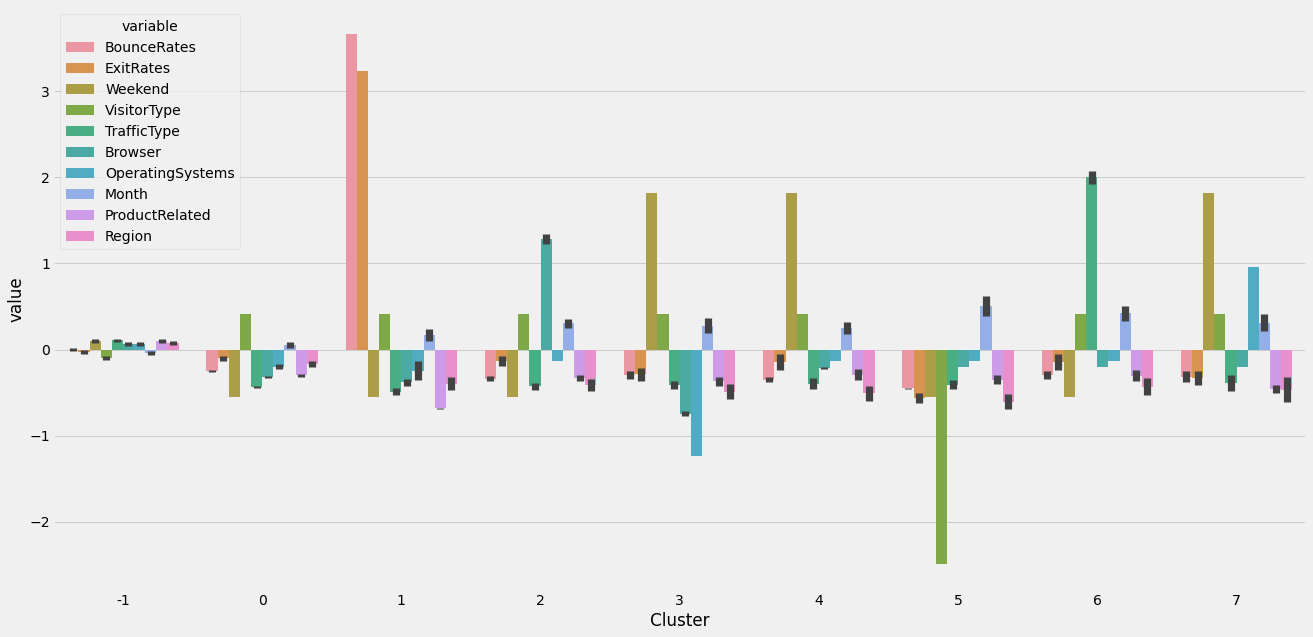

In [66]:
db=DBSCAN(min_samples=37,eps=1.1,n_jobs=-1)
predictions=db.fit_predict(dataScaled)

labels=db.labels_

data['Cluster']=labels
dataScaled['Cluster']=labels
plt.figure(figsize=(20, 10))
#sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)
df_mean = (dataScaled.loc[dataScaled.Cluster!=-1, :]
                    .groupby('Cluster').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['Cluster']
tidy = dataScaled[selected_columns].melt(id_vars='Cluster')
sea.barplot(x='Cluster', y='value', hue='variable', data=tidy)




## PCA

### PCA Analiza sa 2 elemenata

Explained variance ratio (first two components): [0.18364218 0.09652336]


<Figure size 432x288 with 0 Axes>

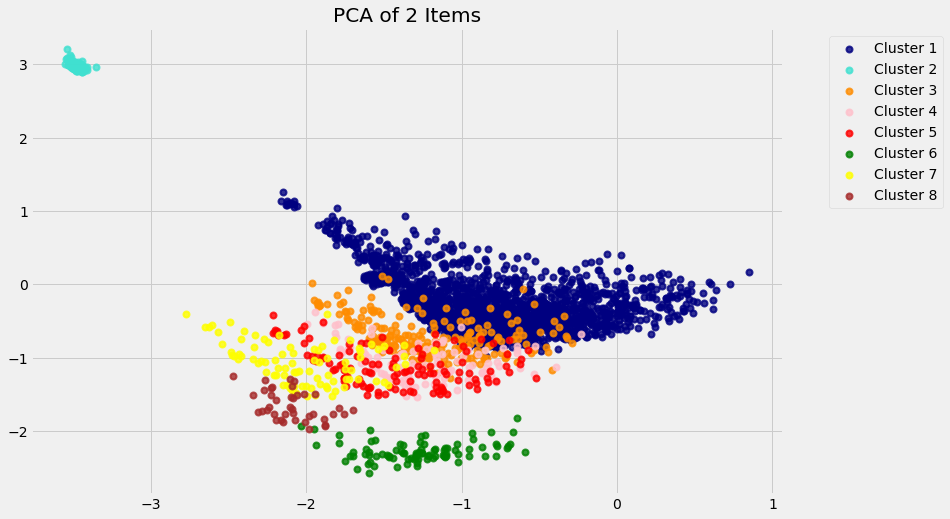

In [67]:

X = dataScaled
y_num = predictions

target_names = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6","Cluster 7","Cluster 8"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange','pink','red','green','yellow','brown','purple']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4,5,6,7,8], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Explained variance ratio (first three components): [0.1836432  0.09652791 0.08686618]


<Figure size 864x576 with 0 Axes>

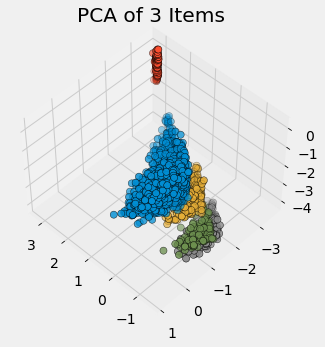

In [68]:
X = dataScaled
y_num = predictions

target_names = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6","Cluster 7","Cluster 8"]

pca = PCA(n_components=3, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first three components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange','pink','red','green','yellow','brown','purple']
lw = 2



fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134,auto_add_to_figure=False)
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    ax.scatter(X_r[y_num == i, 1], X_r[y_num == i, 0], X_r[y_num == i, 2],
           edgecolor="k", s=50)
    fig.add_axes(ax)
plt.title('PCA of 3 Items')
plt.show()



In [69]:
db=DBSCAN(min_samples=37,eps=1.1,n_jobs=-1)
dbp=db.fit(dataScaled)

print('DBSCAN silhouette score: {}'.format(silhouette_score(dataScaled, dbp.labels_, 
                                           metric='euclidean')))

DBSCAN silhouette score: -0.08745500177945807


In [70]:
print('DBSCAN calinski harabasz: {}'.format(calinski_harabasz_score(dataScaled, dbp.labels_, 
                                          )))

DBSCAN calinski harabasz: 237.15908189943966


In [71]:
ari_kmeans = adjusted_rand_score(data.Revenue, dbp.labels_)
ari_kmeans

-0.1285263600144633

# With Outliers

In [72]:
dataWoOutliers= iqr_outliers(data)
dataWoOutliers.shape
dataScaledWO=standard_scale(dataWoOutliers)

In [73]:
no_of_clusters = range(1,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(dataScaledWO)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 1 Clusters is: 48479.99999999999
The innertia for : 2 Clusters is: 43255.38142430714
The innertia for : 3 Clusters is: 39788.745608026584
The innertia for : 4 Clusters is: 37214.291604917424
The innertia for : 5 Clusters is: 34348.91675548771
The innertia for : 6 Clusters is: 32283.260344256232
The innertia for : 7 Clusters is: 30715.622395317485
The innertia for : 8 Clusters is: 29441.81154230735
The innertia for : 9 Clusters is: 28434.116710573966
The innertia for : 10 Clusters is: 27609.72530510436
The innertia for : 11 Clusters is: 26793.396038308918
The innertia for : 12 Clusters is: 25781.959382822664
The innertia for : 13 Clusters is: 25333.30977435308
The innertia for : 14 Clusters is: 24609.72537578623
The innertia for : 15 Clusters is: 24168.271620200925
The innertia for : 16 Clusters is: 23650.007183759983
The innertia for : 17 Clusters is: 23257.19989569317
The innertia for : 18 Clusters is: 22820.806037069255
The innertia for : 19 Clusters is: 22375.7125

Text(0.5, 1.0, 'Inertia graf za k')

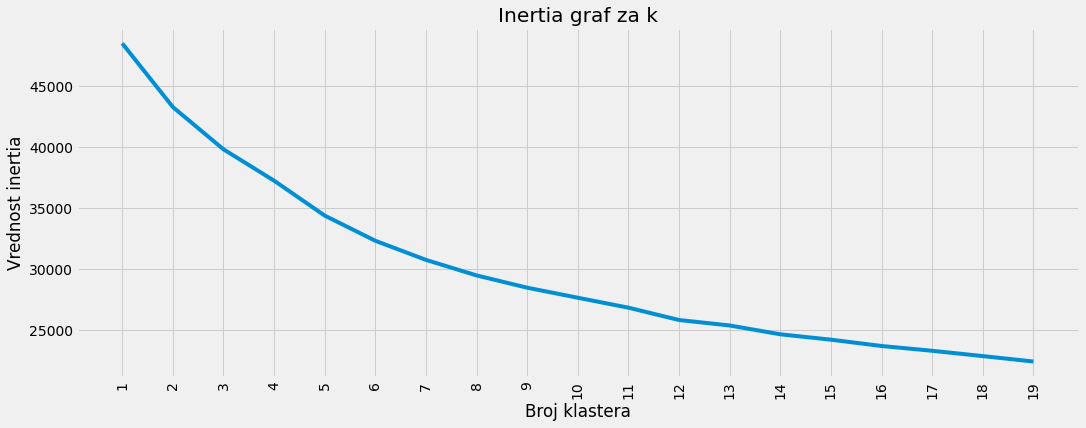

In [74]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Broj klastera')
plt.ylabel('Vrednost inertia')
plt.title("Inertia graf za k")

In [75]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
sc = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(dataScaledWO)
    score = silhouette_score(dataScaledWO, kmeans.labels_)
    sc.append(score)
    print("The silouethe for :", f, "Clusters is:", score)

The silouethe for : 2 Clusters is: 0.11444255473542822
The silouethe for : 3 Clusters is: 0.11483466221406823
The silouethe for : 4 Clusters is: 0.11660646781057903
The silouethe for : 5 Clusters is: 0.13301113039771428
The silouethe for : 6 Clusters is: 0.13577708615010103
The silouethe for : 7 Clusters is: 0.14028011800834791
The silouethe for : 8 Clusters is: 0.13768878343236182
The silouethe for : 9 Clusters is: 0.13063279860659824
The silouethe for : 10 Clusters is: 0.1270988666799023
The silouethe for : 11 Clusters is: 0.13467345106461046
The silouethe for : 12 Clusters is: 0.13264389401372179
The silouethe for : 13 Clusters is: 0.1281359776312732
The silouethe for : 14 Clusters is: 0.12735098350909305
The silouethe for : 15 Clusters is: 0.1321759871178172
The silouethe for : 16 Clusters is: 0.13042884288609885
The silouethe for : 17 Clusters is: 0.1315513837365896
The silouethe for : 18 Clusters is: 0.12922229466526775
The silouethe for : 19 Clusters is: 0.13163504437224424


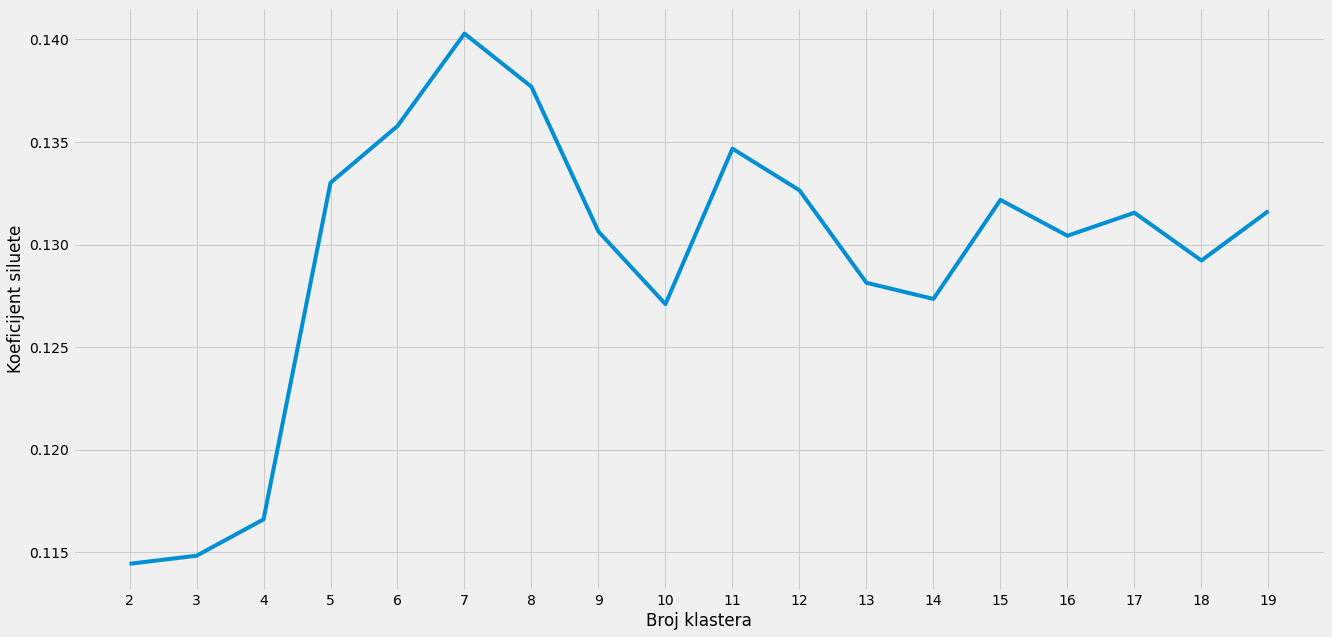

In [76]:
plt.figure(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), sc)
plt.xticks(range(2, 20))
plt.xlabel("Broj klastera")
plt.ylabel("Koeficijent siluete")
plt.show()

In [77]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
ch = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(dataScaledWO)
    score = calinski_harabasz_score(dataScaledWO, kmeans.labels_)
    ch.append(score)
    print("The Calinski-Harabasz for :", f, "Clusters is:", score)

The Calinski-Harabasz for : 2 Clusters is: 390.1381198662154
The Calinski-Harabasz for : 3 Clusters is: 352.66329715633
The Calinski-Harabasz for : 4 Clusters is: 325.736171181049
The Calinski-Harabasz for : 5 Clusters is: 331.8973287846774
The Calinski-Harabasz for : 6 Clusters is: 323.7013955359423
The Calinski-Harabasz for : 7 Clusters is: 310.8630793681224
The Calinski-Harabasz for : 8 Clusters is: 297.82289866136415
The Calinski-Harabasz for : 9 Clusters is: 284.0253781393236
The Calinski-Harabasz for : 10 Clusters is: 270.61328058165554
The Calinski-Harabasz for : 11 Clusters is: 260.7080911308614
The Calinski-Harabasz for : 12 Clusters is: 257.7125899339518
The Calinski-Harabasz for : 13 Clusters is: 245.09626686504842
The Calinski-Harabasz for : 14 Clusters is: 240.1006499159144
The Calinski-Harabasz for : 15 Clusters is: 231.14966428145254
The Calinski-Harabasz for : 16 Clusters is: 225.09720265359732
The Calinski-Harabasz for : 17 Clusters is: 217.9198879783333
The Calinski-H

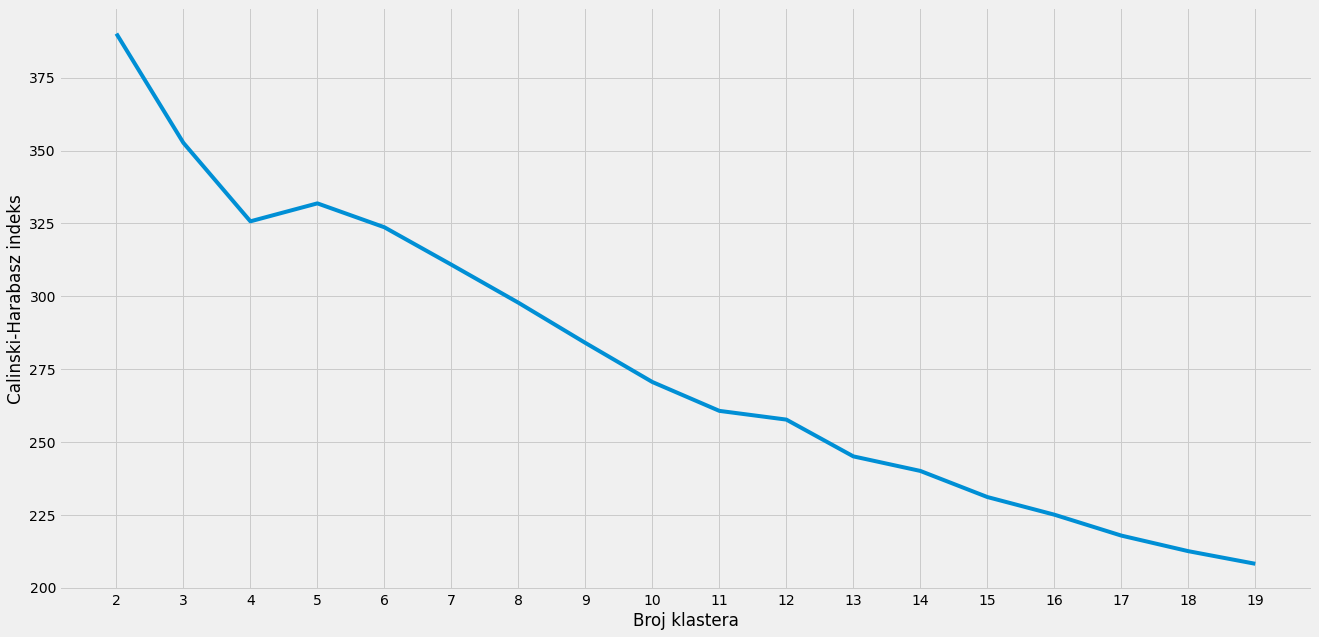

In [78]:
plt.figure(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), ch)
plt.xticks(range(2, 20))
plt.xlabel("Broj klastera")
plt.ylabel("Calinski-Harabasz indeks")
plt.show()

In [79]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(dataScaledWO)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(dataScaledWO)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,1467,1126,639


<AxesSubplot:xlabel='Cluster', ylabel='value'>

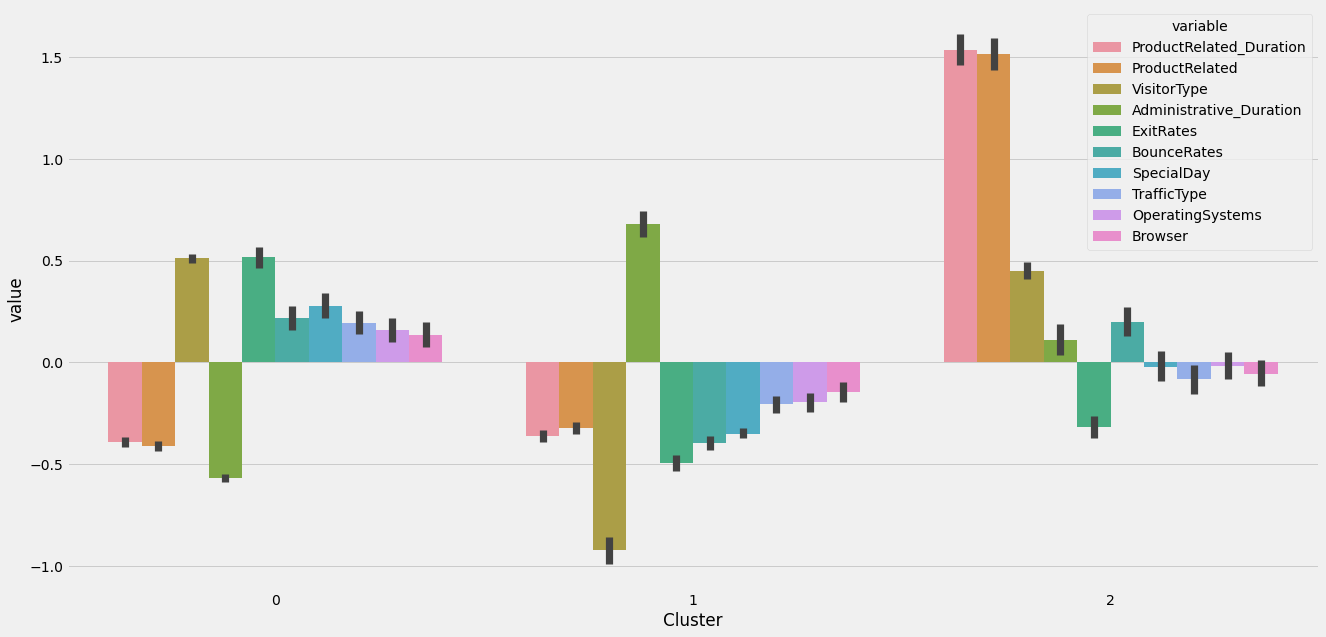

In [80]:
dataWoOutliers['Cluster']=kmeans.labels_
dataScaledWO['Cluster']=kmeans.labels_


plt.figure(figsize=(20, 10))
#sea.scatterplot(y=data['Revenue'],x=data['VisitorType'],hue='Cluster',data=data)
df_mean = (dataScaledWO.loc[dataScaledWO.Cluster!=-1, :]
                    .groupby('Cluster').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(10).Variable.values) + ['Cluster']
tidy = dataScaledWO[selected_columns].melt(id_vars='Cluster')
sea.barplot(x='Cluster', y='value', hue='variable', data=tidy)

In [81]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(dataScaledWO)
# Print results
print('kmeans silhouette score: {}'.format(silhouette_score(dataScaledWO, km.labels_, 
                                           metric='euclidean')))

kmeans silhouette score: 0.13751438213953415


In [82]:
print('kmeans calinski harabasz: {}'.format(calinski_harabasz_score(dataScaledWO, km.labels_, 
                                          )))

kmeans calinski harabasz: 429.51073577039745


In [83]:
labels=km.labels_
ari_kmeans = adjusted_rand_score(dataWoOutliers.Revenue, kmeans.labels_)
ari_kmeans

0.008190078447279177